In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import autoplot as atp
import pandas as pd
import numpy as np
import seaborn as sns
from math import *
import sys

autoplot v0.3.9


Considerações Iniciais:
Usar o K-Means para separar os herois em 3 categorias (ou clusters) diferentes em NLP e Numérico

## Leitura e Descrição dos dados

**Leitura de Csv e preenchimento de Missing Data**

In [2]:
data = pd.read_csv('superheroes_nlp_dataset.csv')
data = data.fillna(" ")

**Descrição dos Dados de todo o Dataset**

Insira texto aqui

**Prévia do Dataset**

In [3]:
data.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",,85,30,60,60,...,0,0,0,0,0,1,0,0,0,1
1,514A (Gotham),Bruce Wayne,,10,He was one of the many prisoners of Indian Hil...,,100,20,30,50,...,0,0,0,0,1,0,1,0,0,1
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0,1,0,0,1,1,1,1,1,1
3,Aa,Aa,,12,Aa is one of the more passive members of the P...,,80,50,55,45,...,0,0,0,0,0,0,0,0,0,0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,,80,10,25,40,...,0,0,1,0,0,0,0,0,0,0


## Preparação para KMeans

**Calculo de número de Clusters**

## Separação do Dataset para testes

**Utilizando apenas scores dos Herois**

In [4]:
short_data = data[["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]]

In [5]:
short_data.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## KMeans

In [6]:
X_1 = np.array(short_data)

In [7]:
X_1

array([[ 85,  30,  60,  60,  40,  70],
       [100,  20,  30,  50,  35, 100],
       [ 80, 100,  80, 100, 100,  80],
       ...,
       [ 95,  50, 100,  75, 100,  80],
       [ 75,  10, 100,  30, 100,  30],
       [ 45,  80,  75,  95,  80,  50]], dtype=int64)

In [8]:
#k = calculate_wcss(X)
X_1

array([[ 85,  30,  60,  60,  40,  70],
       [100,  20,  30,  50,  35, 100],
       [ 80, 100,  80, 100, 100,  80],
       ...,
       [ 95,  50, 100,  75, 100,  80],
       [ 75,  10, 100,  30, 100,  30],
       [ 45,  80,  75,  95,  80,  50]], dtype=int64)

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

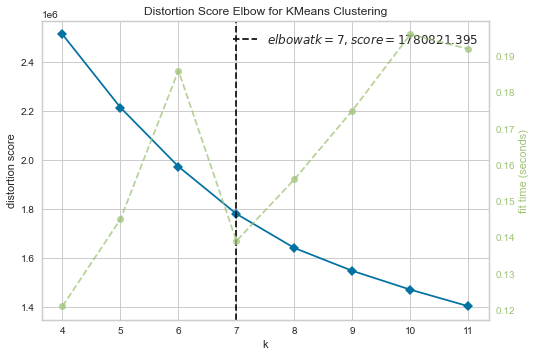

In [11]:
visualizer.fit(X_1)
visualizer.show()  

In [12]:
kmeans = KMeans(n_clusters=7,random_state=0)
kmeans.fit(X_1)

KMeans(n_clusters=7, random_state=0)

In [13]:
predict = kmeans.predict(X_1)
short_data["cl_class"] = predict
print(predict)

[1 1 0 ... 5 5 4]


<ipython-input-13-44419386f730>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_data["cl_class"] = predict


D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg,

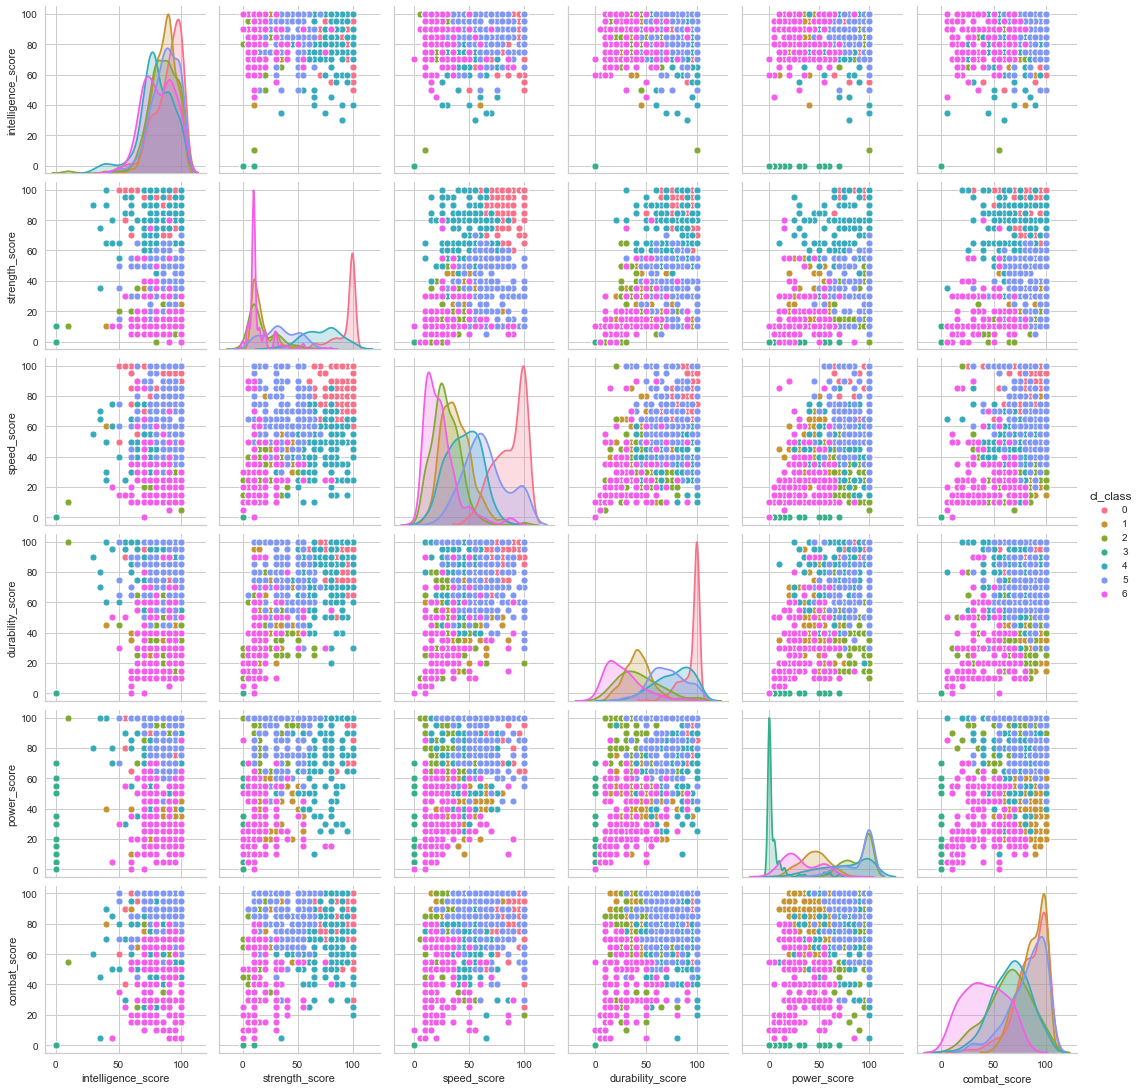

In [14]:
sns.pairplot(data = short_data, hue = "cl_class")

In [ ]:
## Utilizando modelo PCA

features_ = ["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]

x1 = short_data.loc[:, features_].values
x = StandardScaler().fit_transform(x1)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents

**Transformando em dataframe**

df = pd.DataFrame(data=principalComponents, columns=["pc1","pc2"])
df.head(5)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
colors = ['r', 'g','b']
ax.set_title('PCA 2 Componentes', fontsize = 20)
ax.scatter(df['pc1'], df['pc2'], c = "green", s = 50)
ax.grid()